In [1]:
import pandas as pd
import os
import numpy as np
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('mi_data.csv',index_col=None)
df

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery Capacity6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery Capacity6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery Capacity5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery Capacity5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery Capacity4250 mAhBattery TypeLi-Po
...,...,...,...,...,...,...,...,...
543,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery Capacity4050 mAhBattery TypeLi-Polymer
544,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery Capacity4000 mAhBattery Typelithium-ion
545,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery Capacity4520 mAh
546,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery Capacity4000 mAh


In [3]:
df.drop_duplicates(inplace=True,ignore_index=True)

## Battery

In [4]:
count = 0
for i in range(0,len(df['battery'])):
    # print(i)
    df['battery'][i]= df['battery'].iloc[i].replace('Capacity','')
    # print(df['battery'][i])
    count+=1
print(f'looped till {count} index')

looped till 501 index


In [5]:
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model_names   501 non-null    object 
 1   ratings       501 non-null    float64
 2   price         501 non-null    object 
 3   imgURL        501 non-null    object 
 4   storage_ram   501 non-null    object 
 5   os_processor  501 non-null    object 
 6   network       501 non-null    object 
 7   battery       501 non-null    object 
dtypes: float64(1), object(7)
memory usage: 31.4+ KB


,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery
0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery 6000 mAh
1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery 6000 mAh
2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery 5000 mAh
3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery 5000 mAh
4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery 4250 mAhBattery TypeLi-Po
...,...,...,...,...,...,...,...,...
496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer
497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion
498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh
499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh


## Storage and Ram

In [6]:
def extract_storage(row):
    storage = row.split()[1]
    return storage

def extract_ram(row):
    ram = row.split()[2]
    return ram

df['storage'] = df['storage_ram'].apply(func=extract_storage)
df['ram'] = df['storage_ram'].apply(func=extract_ram)

In [7]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['storage'])):
    df['storage'][i]= df['storage'].iloc[i].replace('Storage','')
    count+=1
print(f'looped till {count} index')

looped till 501 index


In [8]:
df['storage'] = df['storage'].astype('Int16')

In [9]:
import warnings
warnings.filterwarnings('ignore')
count = 0
for i in range(0,len(df['ram'])):
    # df['ram'][i]= df['ram'].iloc[i].replace('MBRAM','')
    df['ram'][i]= df['ram'].iloc[i].replace('GBRAM','')
    count+=1
print(f'looped till {count} index')

looped till 501 index


In [10]:
df[df['ram'] == 'MBRAM64']

,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
276,Peace Mi4,3.8,₹849,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 MBRAM64 MBMemory Card Slot...,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery 2500 mAh,128,MBRAM64
319,Peace Mi3 Pro,3.7,₹799,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 MBRAM64 MBMemory Card Slot...,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery 2500 mAh,128,MBRAM64
360,Peace Mi2,4.5,₹849,https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 MBRAM64 MBMemory Card Slot...,Operating System1.77Primary Clock Speed1.77 MHz,Network Type2GSupported NetworksGSM,Battery 2500 mAh,128,MBRAM64


In [11]:
df.drop(index=[276,319,360],inplace=True)

In [12]:
df['ram'] = df['ram'].astype('Int16')

In [13]:
df.reset_index(inplace=True)
df

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery 6000 mAh,128,8
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery 6000 mAh,128,8
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery 5000 mAh,32,2
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery 5000 mAh,32,3
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery 4250 mAhBattery TypeLi-Po,128,6
...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer,32,3
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion,32,3
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh,128,6
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh,64,4


## Processors


In [14]:
def extract_processor(text):
    pattern = r'.*Processor'
    match = re.findall(pattern, text)
    if match:
        return match[0]
    else:
        return text


In [15]:
df['processors'] = df['os_processor'].apply(func=extract_processor)
df

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram,processors
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery 6000 mAh,128,8,Operating SystemAndroid 13Processor
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery 6000 mAh,128,8,Operating SystemAndroid 13Processor
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery 5000 mAh,32,2,Operating SystemAndroid Q 10Processor
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery 5000 mAh,32,3,Operating SystemAndroid Q 10Processor
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery 4250 mAhBattery TypeLi-Po,128,6,Operating SystemAndroid 11Processor TypeQualco...
...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer,32,3,Operating SystemAndroid Lollipop 5.1Processor ...
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion,32,3,Operating SystemAndroid Pie 9Processor
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh,128,6,Operating SystemAndroid Nougat 11Processor
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh,64,4,Operating SystemAndroid Nougat 7.1.2Processor ...


## Android Version

In [16]:
def android_version(text_):
    pattern=r'^\d+[Processor]|\d+[GProcessor]|\d+[.Processor]'
    found = re.findall(pattern,text_)
    if found:
        return found[0]
    else:
        return np.nan

In [17]:
df['android_version'] = df['processors'].apply(android_version)

In [18]:
for Index,i in enumerate(df['android_version']):
    # print(i)
    i = str(i).replace('P','')
    i = str(i).replace('.','')
    df['android_version'][Index] = i

In [19]:
# df['android_version'] = df['android_version'].astype('Int16')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            498 non-null    int64  
 1   model_names      498 non-null    object 
 2   ratings          498 non-null    float64
 3   price            498 non-null    object 
 4   imgURL           498 non-null    object 
 5   storage_ram      498 non-null    object 
 6   os_processor     498 non-null    object 
 7   network          498 non-null    object 
 8   battery          498 non-null    object 
 9   storage          498 non-null    Int16  
 10  ram              498 non-null    Int16  
 11  processors       498 non-null    object 
 12  android_version  498 non-null    object 
dtypes: Int16(2), float64(1), int64(1), object(9)
memory usage: 45.8+ KB


In [21]:
df

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram,processors,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery 6000 mAh,128,8,Operating SystemAndroid 13Processor,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery 6000 mAh,128,8,Operating SystemAndroid 13Processor,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery 5000 mAh,32,2,Operating SystemAndroid Q 10Processor,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery 5000 mAh,32,3,Operating SystemAndroid Q 10Processor,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery 4250 mAhBattery TypeLi-Po,128,6,Operating SystemAndroid 11Processor TypeQualco...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer,32,3,Operating SystemAndroid Lollipop 5.1Processor ...,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion,32,3,Operating SystemAndroid Pie 9Processor,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh,128,6,Operating SystemAndroid Nougat 11Processor,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh,64,4,Operating SystemAndroid Nougat 7.1.2Processor ...,7


## Processors

In [22]:
def processor(text):
    pattern=r'(?<=Type).*'
    search = re.search(pattern,text)
    if search != None:
        return ' '.join(re.findall(pattern,text))
    else:
        return 'not montioned'

In [23]:
df['processors'] = df['processors'].apply(processor)

In [24]:
df

,index,model_names,ratings,price,imgURL,storage_ram,os_processor,network,battery,storage,ram,processors,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,"₹13,500",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G LTE,Battery 6000 mAh,128,8,not montioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,"₹12,840",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM8 GBMemory Card Slot ...,Operating SystemAndroid 13Processor CoreOcta C...,Network Type4G VOLTESupported Networks4G VoLTE,Battery 6000 mAh,128,8,not montioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,"₹7,520",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM2 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery 5000 mAh,32,2,not montioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,"₹8,450",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Q 10Processor CoreOcta...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery 5000 mAh,32,3,not montioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,"₹21,644",https://rukminim2.flixcart.com/image/312/312/x...,Internal Storage128 GBRAM6 GBExpandable Storag...,Operating SystemAndroid 11Processor TypeQualco...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery 4250 mAhBattery TypeLi-Po,128,6,Qualcomm Snapdragon 778GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage32 GBRAM3 GBExpandable Storage...,Operating SystemAndroid Lollipop 5.1Processor ...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Internal Storage32 GBRAM3 GBMemory Card Slot T...,Operating SystemAndroid Pie 9Processor CoreOct...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage128 GBRAM6 GB,Operating SystemAndroid Nougat 11Processor Cor...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,Internal Storage64 GBRAM4 GBExpandable Storage...,Operating SystemAndroid Nougat 7.1.2Processor ...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh,64,4,Qualcomm Snapdragon 636Processor,7


## Remove columns
1) storage_ram
2) os_processor


In [25]:
df = df.drop(columns=['os_processor','storage_ram'])

In [26]:
df.rename({'processors':'processor'},axis=1,inplace=True)

In [27]:
df.tail()

,index,model_names,ratings,price,imgURL,network,battery,storage,ram,processor,android_version
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,"₹26,999",https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,"₹8,999",https://rukminim2.flixcart.com/image/312/312/m...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,"₹11,990",https://rukminim2.flixcart.com/image/312/312/k...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,"₹24,999",https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh,64,4,Qualcomm Snapdragon 636Processor,7
497,500,"Redmi Note 5 Pro (Red, 64 GB)",4.1,"₹12,500",https://rukminim2.flixcart.com/image/312/312/j...,"Network Type3G, 4G, 2GSupported NetworksGSM, W...",Battery 3080 mAh,64,4,Qualcomm Snapdragon 435Processor,7


## Price

In [28]:
for Index,i in enumerate(df['price']):
    i = str(i).replace('₹','')
    i = str(i).replace(',','')
    df['price'][Index] = i

In [29]:
df['price'] = df['price'].astype('Int16')

In [30]:
df

,index,model_names,ratings,price,imgURL,network,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,https://rukminim2.flixcart.com/image/312/312/x...,Network Type4G VOLTESupported Networks4G LTE,Battery 6000 mAh,128,8,not montioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,https://rukminim2.flixcart.com/image/312/312/x...,Network Type4G VOLTESupported Networks4G VoLTE,Battery 6000 mAh,128,8,not montioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type4G VOLTE, 4GSupported Networks4G LTE",Battery 5000 mAh,32,2,not montioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type4G VOLTE, 4GSupported Networks4G V...",Battery 5000 mAh,32,3,not montioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,https://rukminim2.flixcart.com/image/312/312/x...,"Network Type5G, 4G VOLTESupported Networks5G, ...",Battery 4250 mAhBattery TypeLi-Po,128,6,Qualcomm Snapdragon 778GProcessor,11
...,...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4GSupported NetworksGSM, 4G LT...",Battery 4050 mAhBattery TypeLi-Polymer,32,3,Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/m...,Network Type4G VOLTESupported Networks4G LTEBl...,Battery 4000 mAhBattery Typelithium-ion,32,3,not montioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type4G VOLTE, 5GSupported Networks4G V...",Battery 4520 mAh,128,6,not montioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,https://rukminim2.flixcart.com/image/312/312/k...,"Network Type3G, 4G VOLTE, 4GSupported Networks...",Battery 4000 mAh,64,4,Qualcomm Snapdragon 636Processor,7


## Processor

In [31]:
df['processor']

0                                         not montioned
1                                         not montioned
2                                         not montioned
3                                         not montioned
4                     Qualcomm Snapdragon 778GProcessor
                             ...                       
493    Qualcomm Snapdragon 650 64-bit 0 1.8GHzProcessor
494                                       not montioned
495                                       not montioned
496                    Qualcomm Snapdragon 636Processor
497                    Qualcomm Snapdragon 435Processor
Name: processor, Length: 498, dtype: object

In [32]:
def processor_extract(text):
    splitted_sentence = text.split()
    if 'Mediatek' and 'Helio' in splitted_sentence:
        pattern = r'\d+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Heilo'+''.join(match)

    elif 'Mediatek' and 'Dimensity' in splitted_sentence:
        pattern = r'\d+[Processor]'
        string = ' '.join(splitted_sentence)
        match = re.findall(pattern,string)
        return 'Dimensity'+ ''.join(match)

    elif 'Snapdragon' and 'Gen' and '4' in splitted_sentence:
        return 'Gen4'   

    elif 'Snapdragon' and 'Gen' and '8' in splitted_sentence:         
        return 'Gen8'
    
    elif 'Snapdragon' in splitted_sentence:
        pattern = r'\d+[Processor]|\d+[GProcessor]'
        if 'Gen' and '4' and '8' not in splitted_sentence:
            string = ' '.join(splitted_sentence)
            match = re.findall(pattern,string)
            return 'Snapdragon'+''.join(match)

    else:
        return 'not mentioned'      

In [33]:
df['processor']=df['processor'].apply(processor_extract)

## Network
I don't need in my project I will just drop.

In [34]:
df = df.drop(labels=['network'],axis=1)

In [35]:
df

,index,model_names,ratings,price,imgURL,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,https://rukminim2.flixcart.com/image/312/312/x...,Battery 6000 mAh,128,8,not mentioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,https://rukminim2.flixcart.com/image/312/312/x...,Battery 6000 mAh,128,8,not mentioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,https://rukminim2.flixcart.com/image/312/312/x...,Battery 5000 mAh,32,2,not mentioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,https://rukminim2.flixcart.com/image/312/312/x...,Battery 5000 mAh,32,3,not mentioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,https://rukminim2.flixcart.com/image/312/312/x...,Battery 4250 mAhBattery TypeLi-Po,128,6,Snapdragon778G,11
...,...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,https://rukminim2.flixcart.com/image/312/312/k...,Battery 4050 mAhBattery TypeLi-Polymer,32,3,Snapdragon8G,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,https://rukminim2.flixcart.com/image/312/312/m...,Battery 4000 mAhBattery Typelithium-ion,32,3,not mentioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,https://rukminim2.flixcart.com/image/312/312/k...,Battery 4520 mAh,128,6,not mentioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,https://rukminim2.flixcart.com/image/312/312/k...,Battery 4000 mAh,64,4,Snapdragon636P,7


In [36]:
df.drop(columns='imgURL', inplace=True)
df

,index,model_names,ratings,price,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,Battery 6000 mAh,128,8,not mentioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,Battery 6000 mAh,128,8,not mentioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,Battery 5000 mAh,32,2,not mentioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,Battery 5000 mAh,32,3,not mentioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,Battery 4250 mAhBattery TypeLi-Po,128,6,Snapdragon778G,11
...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,Battery 4050 mAhBattery TypeLi-Polymer,32,3,Snapdragon8G,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,Battery 4000 mAhBattery Typelithium-ion,32,3,not mentioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,Battery 4520 mAh,128,6,not mentioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,Battery 4000 mAh,64,4,Snapdragon636P,7


In [37]:
df.sort_values('ratings', ascending=False)

,index,model_names,ratings,price,battery,storage,ram,processor,android_version
119,119,"Redmi K20 (Pearl White, 128 GB)",4.5,24999,Battery 4000 mAh,128,6,Snapdragon730P,9
153,153,"Redmi Note 5 Pro (Lake Blue, 64 GB)",4.5,14999,Battery 4000 mAh,64,4,Snapdragon636P,7
145,145,"Redmi 5A (Grey, 16 GB)",4.5,5999,Battery 3000 mAh,16,2,Snapdragon425P,7
446,449,"Mi 5 (Black, 32 GB)",4.5,24999,Battery 3000 mAhBattery TypeLi-Ion Polymer,32,3,Snapdragon,6
147,147,"Redmi 5A (Blue, 16 GB)",4.5,5999,Battery 3000 mAh,16,2,Snapdragon425P,7
...,...,...,...,...,...,...,...,...,...
358,361,"REDMI Note 8 Pro (Halo White, 128 GB)",2.5,17999,Battery 4500 mAhBattery Typelithium-ionTalk Ti...,128,6,Heilo,9
357,359,"REDMI 12C (Matte Black, 6 GB)",2.5,11498,Battery 5000 mAh,6,128,not mentioned,12
349,351,"REDMI 12c (Mint Green, 6 GB)",2.5,10999,Battery 5000 mAh,6,128,not mentioned,12
327,329,"REDMI 12C (Lavender Purple, 6 GB)",2.5,11349,Battery 5000 mAh,6,128,not mentioned,12


In [38]:
df.sort_values('price').min()

index                               0
model_names        10A (Black, 64 GB)
ratings                           2.5
price                          -32537
battery              Battery 2000 mAh
storage                             6
ram                                 1
processor              Dimensity1080P
android_version                    10
dtype: object

In [40]:
df.dtypes

index                int64
model_names         object
ratings            float64
price                Int16
battery             object
storage              Int16
ram                  Int16
processor           object
android_version     object
dtype: object

In [41]:
df = df.loc[df['price'] > 1]

In [42]:
df['price'].mean()

15494.808016877638

In [43]:
import seaborn as sns

<Axes: xlabel='price', ylabel='processor'>

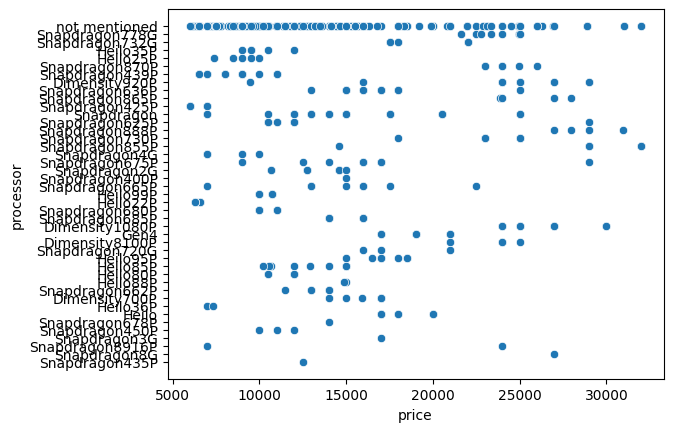

In [44]:
sns.scatterplot(data=df, x=df['price'], y=df['processor'])

In [45]:
df.groupby(['ratings']) \
    .agg({'price' : 'mean'})

,price
ratings,
2.5,12556.0
3.5,9999.0
3.6,23999.0
3.7,11749.0
3.9,7110.285714
4.0,20833.0
4.1,14358.653061
4.2,16649.841463
4.3,13780.659341


In [46]:
df

,index,model_names,ratings,price,battery,storage,ram,processor,android_version
0,0,"REDMI 10 Power (Sporty Orange, 128 GB)",4.2,13500,Battery 6000 mAh,128,8,not mentioned,13
1,1,"REDMI 10 Power (Power Black, 128 GB)",4.2,12840,Battery 6000 mAh,128,8,not mentioned,13
2,2,"Redmi 9A Sport (Metallic Blue, 32 GB)",4.1,7520,Battery 5000 mAh,32,2,not mentioned,10
3,3,"Redmi 9A Sport (Coral Green, 32 GB)",4.2,8450,Battery 5000 mAh,32,3,not mentioned,10
4,4,"Xiaomi 11Lite NE (Vinyl Black, 128 GB)",4.2,21644,Battery 4250 mAhBattery TypeLi-Po,128,6,Snapdragon778G,11
...,...,...,...,...,...,...,...,...,...
493,496,"Xiaomi 11i 5G (Camo Green, 128 GB)",4.5,26999,Battery 4050 mAhBattery TypeLi-Polymer,32,3,Snapdragon8G,5
494,497,"Redmi Note 3 (Gold, 32 GB)",4.1,8999,Battery 4000 mAhBattery Typelithium-ion,32,3,not mentioned,9
495,498,"Redmi Note 8 (Moonlight White, 32 GB)",4.3,11990,Battery 4520 mAh,128,6,not mentioned,11
496,499,"MI 11X 5G (CELESTIAL SILVER, 128 GB)",4.3,24999,Battery 4000 mAh,64,4,Snapdragon636P,7


# Now we have a Dataframe that we can work with

## 